In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()  

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:] #前五千张做验证集，后五万五千张做训练集
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
print(x_train.shape)
print(x_train[0])

(55000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 19

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) #先变一列，再变55000列个28*28矩阵

x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [12]:
print(x_train_scaled.shape)
print(x_train_scaled[0])

(55000, 28, 28)
[[-0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.7994012  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.8105136 ]
 [-0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.32156894
   0.6007586   1.2119396   1.2452767   0.9785796   0.522972   -0.19933274
  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.8105136 ]
 [-0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0.8105136  -0.8105136  -0.8105136  -0.3437937   1.3897376   1.9786937
   2.0231433   1.9786937   1.956469    1.9342443   2.0231433   1.9898062
   1.5675358   0.30072436 -0.8105136  -0.8105136  -0.8105136  -0.8105136
  -0

In [15]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [6]:
x_train = x_train / 255.0

x_test = x_test / 255.0

x_valid = x_valid / 255.0

In [17]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

#relu: y = max(0,x)
#softmax: 将向量变成概率分布

#这里用sparse的原因是y已经one hot过了，是个稀疏矩阵，如果只是一个index的话就不用sparse
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'sgd',
              metrics=['accuracy'])


In [24]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3815 - accuracy: 0.8644 - val_loss: 0.3849 - val_accuracy: 0.8628
Epoch 2/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3748 - accuracy: 0.8664 - val_loss: 0.3785 - val_accuracy: 0.8648
Epoch 3/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.3686 - accuracy: 0.8678 - val_loss: 0.3738 - val_accuracy: 0.8652
Epoch 4/10
55000/55000 [==============================] - 8s 141us/sample - loss: 0.3633 - accuracy: 0.8695 - val_loss: 0.3694 - val_accuracy: 0.8658
Epoch 5/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3579 - accuracy: 0.8719 - val_loss: 0.3645 - val_accuracy: 0.8670
Epoch 6/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.3534 - accuracy: 0.8745 - val_loss: 0.3716 - val_accuracy: 0.8680
Epoch 7/10
55000/55000 [===========================

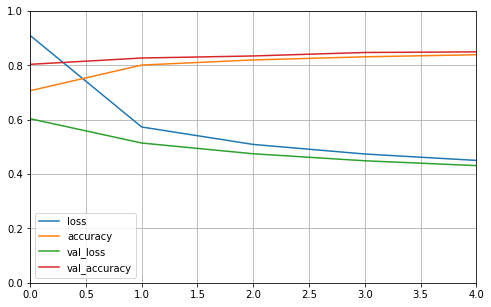

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [25]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.3893 - accuracy: 0.8600


[0.38926970262527466, 0.86]